In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
#from pandas_profiling import ProfileReport
%matplotlib inline
plt.style.use("ggplot")

In [27]:
df = pd.read_csv('/content/sample_data/unemployeement_rate.csv')
df

,Regions,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Republic of Uzbekistan,0.392531,0.408786,0.371485,0.334678,0.350912,0.270931,0.243031,4.989734,4.892658,...,4.859834,5.086854,5.152640,5.163168,5.800000,9.3,9.0,10.5,9.624736,8.861741
1,Republic of Karakalpakstan,1.708543,1.650428,1.456980,1.144964,1.041667,1.019651,0.804241,6.955934,6.965174,...,6.192379,5.436272,5.320108,5.406606,6.000000,9.5,9.1,10.5,10.092917,9.143519
2,Andijan,0.288774,0.329179,0.287422,0.156652,0.161952,0.094172,0.091278,5.863253,5.767500,...,5.354909,5.588837,5.611222,5.635544,6.000000,9.6,9.2,10.9,9.889413,9.143742
3,Bukhara,0.255363,0.267424,0.147324,0.079681,0.123077,0.134429,0.116077,4.505598,4.405402,...,4.759688,5.215889,5.524989,5.398900,5.500000,8.7,8.9,10.6,9.844938,8.846258
4,Jizzakh,0.270453,0.267738,0.327547,0.159795,0.308452,0.269946,0.262774,4.204204,4.121244,...,5.076606,5.430464,5.156854,5.407654,5.000000,9.8,9.2,11.0,10.104976,9.343958
5,Kashkadarya,0.261384,0.284437,0.239203,0.207227,0.287968,0.303324,0.328330,5.174463,5.007318,...,5.156554,5.458422,5.462810,5.300722,6.100000,9.7,9.3,11.1,10.228509,9.326152
6,Navoi,1.044547,0.541353,0.611354,0.561010,0.890929,0.607020,0.673924,4.950012,4.868106,...,5.153707,5.206220,5.049594,5.042774,5.200000,8.7,8.5,9.4,8.848419,8.019382
7,Namangan,0.473934,0.321440,0.298601,0.427220,0.310973,0.373402,0.320200,5.951319,5.766144,...,5.204071,5.275392,5.214754,5.340769,5.800000,9.6,9.1,10.6,9.743241,8.931267
8,Samarkand,0.443195,0.467836,0.478867,0.345178,0.343171,0.171119,0.165899,5.457165,5.364331,...,5.315661,5.561915,5.664445,5.749825,6.500000,9.7,9.3,11.0,9.902638,9.344980
9,Surkhandarya,0.156331,0.154110,0.184471,0.293686,0.189484,0.137910,0.177751,4.823063,4.671417,...,5.180670,5.453592,5.454545,5.577924,6.700000,9.7,9.3,11.1,10.212607,9.331045


In [28]:
np.round(df,2)

,Regions,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Republic of Uzbekistan,0.39,0.41,0.37,0.33,0.35,0.27,0.24,4.99,4.89,...,4.86,5.09,5.15,5.16,5.80,9.3,9.0,10.5,9.62,8.86
1,Republic of Karakalpakstan,1.71,1.65,1.46,1.14,1.04,1.02,0.80,6.96,6.97,...,6.19,5.44,5.32,5.41,6.00,9.5,9.1,10.5,10.09,9.14
2,Andijan,0.29,0.33,0.29,0.16,0.16,0.09,0.09,5.86,5.77,...,5.35,5.59,5.61,5.64,6.00,9.6,9.2,10.9,9.89,9.14
3,Bukhara,0.26,0.27,0.15,0.08,0.12,0.13,0.12,4.51,4.41,...,4.76,5.22,5.52,5.40,5.50,8.7,8.9,10.6,9.84,8.85
4,Jizzakh,0.27,0.27,0.33,0.16,0.31,0.27,0.26,4.20,4.12,...,5.08,5.43,5.16,5.41,5.00,9.8,9.2,11.0,10.10,9.34
5,Kashkadarya,0.26,0.28,0.24,0.21,0.29,0.30,0.33,5.17,5.01,...,5.16,5.46,5.46,5.30,6.10,9.7,9.3,11.1,10.23,9.33
6,Navoi,1.04,0.54,0.61,0.56,0.89,0.61,0.67,4.95,4.87,...,5.15,5.21,5.05,5.04,5.20,8.7,8.5,9.4,8.85,8.02
7,Namangan,0.47,0.32,0.30,0.43,0.31,0.37,0.32,5.95,5.77,...,5.20,5.28,5.21,5.34,5.80,9.6,9.1,10.6,9.74,8.93
8,Samarkand,0.44,0.47,0.48,0.35,0.34,0.17,0.17,5.46,5.36,...,5.32,5.56,5.66,5.75,6.50,9.7,9.3,11.0,9.90,9.34
9,Surkhandarya,0.16,0.15,0.18,0.29,0.19,0.14,0.18,4.82,4.67,...,5.18,5.45,5.45,5.58,6.70,9.7,9.3,11.1,10.21,9.33


In [29]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
2000,15.0,0.452423,0.414126,0.078081,0.258373,0.288774,0.458564,1.708543
2001,15.0,0.458865,0.377969,0.099141,0.276087,0.325234,0.504595,1.650428
2002,15.0,0.423488,0.359213,0.097056,0.222627,0.298601,0.451789,1.456980
2003,15.0,0.390444,0.370635,0.073414,0.158224,0.293686,0.401651,1.327968
2004,15.0,0.428989,0.422196,0.101461,0.171090,0.308452,0.394035,1.592852
2005,15.0,0.325105,0.296638,0.085353,0.136169,0.213751,0.338363,1.019651
2006,15.0,0.293051,0.220775,0.082823,0.140988,0.243031,0.324265,0.804241
2007,15.0,4.975426,0.903342,3.296328,4.354901,4.950012,5.455370,6.955934
2008,15.0,4.874749,0.905325,3.272851,4.263323,4.868106,5.362189,6.965174
2009,15.0,5.050671,0.734279,3.420099,4.691402,5.106984,5.406110,6.852668


In [30]:

df

,Regions,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Republic of Uzbekistan,0.392531,0.408786,0.371485,0.334678,0.350912,0.270931,0.243031,4.989734,4.892658,...,4.859834,5.086854,5.152640,5.163168,5.800000,9.3,9.0,10.5,9.624736,8.861741
1,Republic of Karakalpakstan,1.708543,1.650428,1.456980,1.144964,1.041667,1.019651,0.804241,6.955934,6.965174,...,6.192379,5.436272,5.320108,5.406606,6.000000,9.5,9.1,10.5,10.092917,9.143519
2,Andijan,0.288774,0.329179,0.287422,0.156652,0.161952,0.094172,0.091278,5.863253,5.767500,...,5.354909,5.588837,5.611222,5.635544,6.000000,9.6,9.2,10.9,9.889413,9.143742
3,Bukhara,0.255363,0.267424,0.147324,0.079681,0.123077,0.134429,0.116077,4.505598,4.405402,...,4.759688,5.215889,5.524989,5.398900,5.500000,8.7,8.9,10.6,9.844938,8.846258
4,Jizzakh,0.270453,0.267738,0.327547,0.159795,0.308452,0.269946,0.262774,4.204204,4.121244,...,5.076606,5.430464,5.156854,5.407654,5.000000,9.8,9.2,11.0,10.104976,9.343958
5,Kashkadarya,0.261384,0.284437,0.239203,0.207227,0.287968,0.303324,0.328330,5.174463,5.007318,...,5.156554,5.458422,5.462810,5.300722,6.100000,9.7,9.3,11.1,10.228509,9.326152
6,Navoi,1.044547,0.541353,0.611354,0.561010,0.890929,0.607020,0.673924,4.950012,4.868106,...,5.153707,5.206220,5.049594,5.042774,5.200000,8.7,8.5,9.4,8.848419,8.019382
7,Namangan,0.473934,0.321440,0.298601,0.427220,0.310973,0.373402,0.320200,5.951319,5.766144,...,5.204071,5.275392,5.214754,5.340769,5.800000,9.6,9.1,10.6,9.743241,8.931267
8,Samarkand,0.443195,0.467836,0.478867,0.345178,0.343171,0.171119,0.165899,5.457165,5.364331,...,5.315661,5.561915,5.664445,5.749825,6.500000,9.7,9.3,11.0,9.902638,9.344980
9,Surkhandarya,0.156331,0.154110,0.184471,0.293686,0.189484,0.137910,0.177751,4.823063,4.671417,...,5.180670,5.453592,5.454545,5.577924,6.700000,9.7,9.3,11.1,10.212607,9.331045


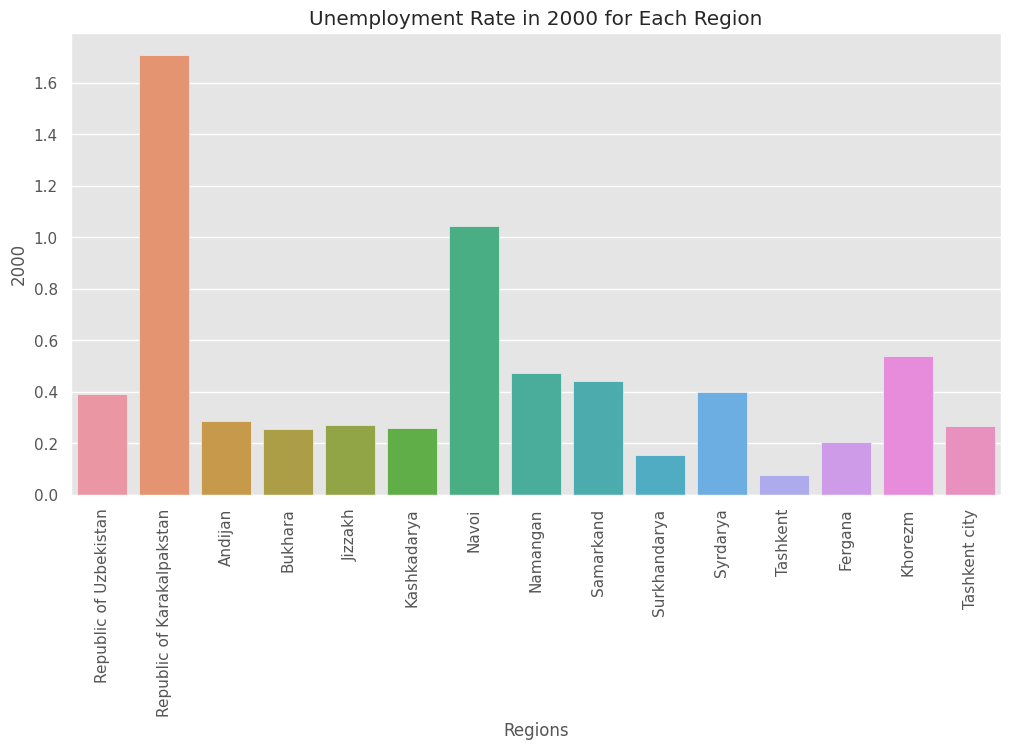

In [41]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Regions', y='2000', data=df)
plt.xticks(rotation=90)
plt.title('Unemployment Rate in 2000 for Each Region')
plt.show()


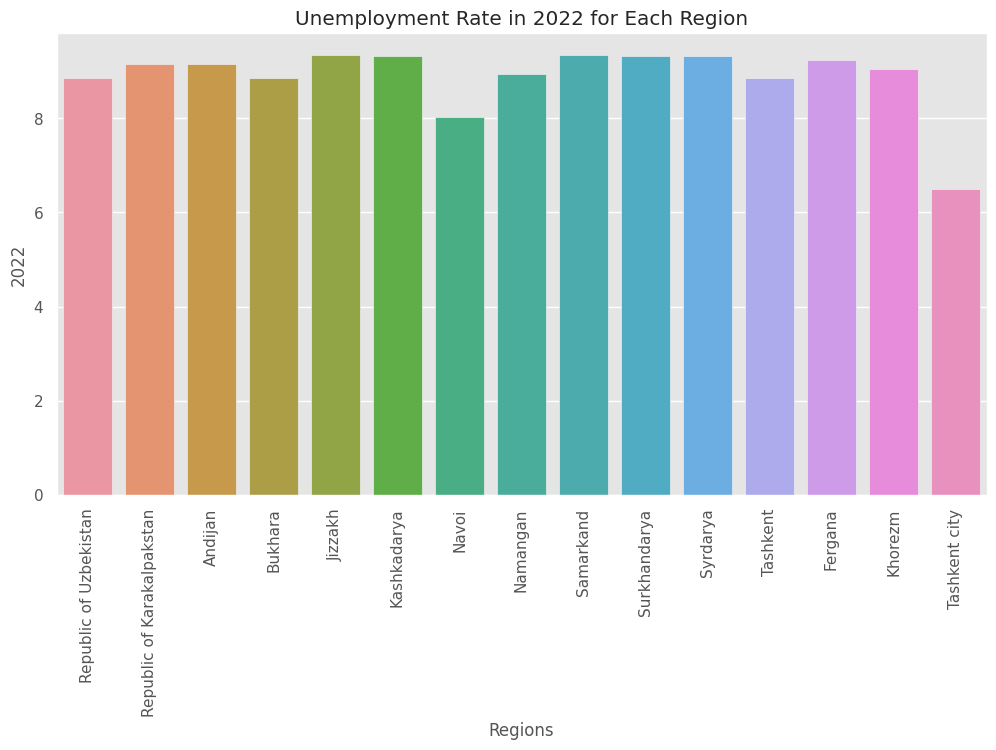

In [42]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Regions', y='2022', data=df)
plt.xticks(rotation=90)
plt.title('Unemployment Rate in 2022 for Each Region')
plt.show()

In [35]:
# Assuming 'X' is the year and 'y' is the unemployment rate for the chosen region
X = df.columns[2:].astype(int).values.reshape(-1, 1)
y = df.loc[df['Regions'] == region_name].values[:, 2:].flatten().astype(float)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions for the year 2023
prediction_2023 = model.predict([[2023]])
print(f'Predicted Unemployment Rate for {region_name} in 2023: {prediction_2023[0]:.2f}%')


Predicted Unemployment Rate for Republic of Uzbekistan in 2023: 10.59%


In [36]:
df.columns = [col.strip() for col in df.columns]

# Extract years and convert to integers
years = df.columns[2:].astype(int).values.reshape(-1, 1)

# Iterate over each region
predictions = {}

for index, row in df.iterrows():
    region_name = row['Regions']
    unemployment_rates = row.values[2:].astype(float)

    # Train a linear regression model
    model = LinearRegression()
    model.fit(years, unemployment_rates)

    # Make predictions for the year 2023
    prediction_2023 = model.predict([[2023]])[0]
    predictions[region_name] = prediction_2023

# Display predictions
for region, prediction in predictions.items():
    print(f'Predicted Unemployment Rate for {region} in 2023: {prediction:.2f}%')


Predicted Unemployment Rate for Republic of Uzbekistan in 2023: 10.23%
Predicted Unemployment Rate for Republic of Karakalpakstan in 2023: 10.44%
Predicted Unemployment Rate for Andijan in 2023: 10.72%
Predicted Unemployment Rate for Bukhara in 2023: 10.26%
Predicted Unemployment Rate for Jizzakh in 2023: 10.59%
Predicted Unemployment Rate for Kashkadarya in 2023: 10.80%
Predicted Unemployment Rate for Navoi in 2023: 9.44%
Predicted Unemployment Rate for Namangan in 2023: 10.44%
Predicted Unemployment Rate for Samarkand in 2023: 10.84%
Predicted Unemployment Rate for Surkhandarya in 2023: 10.93%
Predicted Unemployment Rate for Syrdarya in 2023: 10.15%
Predicted Unemployment Rate for Tashkent in 2023: 9.62%
Predicted Unemployment Rate for Fergana in 2023: 10.75%
Predicted Unemployment Rate for Khorezm in 2023: 10.29%
Predicted Unemployment Rate for Tashkent city in 2023: 7.75%


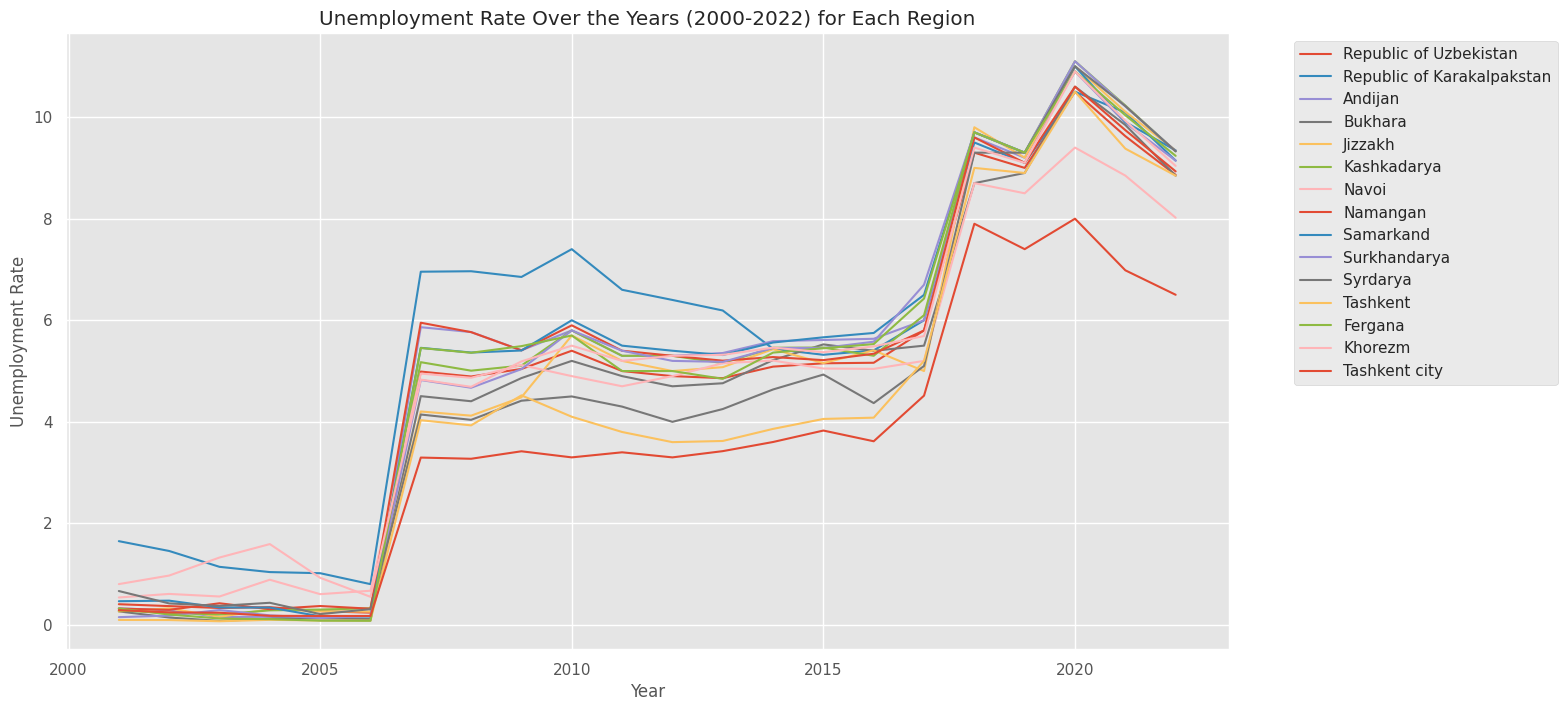

In [37]:
plt.figure(figsize=(15, 8))

for index, row in df.iterrows():
    region_name = row['Regions']
    years = row.index[2:].astype(int)
    unemployment_rates = row.values[2:].astype(float)

    plt.plot(years, unemployment_rates, label=region_name)

plt.title('Unemployment Rate Over the Years (2000-2022) for Each Region')
plt.xlabel('Year')
plt.ylabel('Unemployment Rate')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()